## データ取り込みと補正

In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# データ読み込み
# データの読み込み
train_data = pd.read_csv('train.csv')

# 不要項目を削除する
train_data_var = train_data.drop(columns=['id'])

# 欠損値を削除する
train_data_var_drop = train_data_var.dropna()

# 欠損値を'0 years'で補正する
train_data_var_fill = train_data_var.fillna('0 years')

# 補正データの確認
print(train_data_var_drop.shape)
print(train_data_var_drop.head())
print(train_data_var_fill.shape)
print(train_data_var_fill.head())


(228971, 9)
   loan_amnt     term  interest_rate grade employment_length  \
1     1200.0  5 years          16.29    C4           2 years   
2     2000.0  5 years          21.98    E4          10 years   
3     1000.0  3 years           8.59    A5           4 years   
4     1500.0  3 years          13.99    C1           4 years   
5      310.0  3 years           7.35    A4           3 years   

              purpose  credit_score application_type loan_status  
1  debt_consolidation         700.0       Individual  ChargedOff  
2    home_improvement         670.0       Individual   FullyPaid  
3  debt_consolidation         710.0       Individual   FullyPaid  
4  debt_consolidation         680.0       Individual   FullyPaid  
5      major_purchase         790.0       Individual   FullyPaid  
(242156, 9)
   loan_amnt     term  interest_rate grade employment_length  \
0     1800.0  3 years          14.49    C4           0 years   
1     1200.0  5 years          16.29    C4           2 years 

## データ調査

In [8]:
# 基本統計量を算出する
print(train_data_var_drop.describe())
print(train_data_var_fill.describe())


           loan_amnt  interest_rate   credit_score
count  228971.000000  228971.000000  228971.000000
mean     1433.415476      13.992611     697.338484
std       875.149218       4.846862      31.715229
min       100.000000       5.320000     660.000000
25%       780.000000      10.640000     675.000000
50%      1200.000000      13.490000     690.000000
75%      2000.000000      16.990000     715.000000
max      4000.000000      30.990000     845.000000
           loan_amnt  interest_rate   credit_score
count  242156.000000  242156.000000  242156.000000
mean     1417.203456      13.988211     697.442331
std       872.780311       4.847934      31.922166
min       100.000000       5.320000     660.000000
25%       750.000000      10.640000     675.000000
50%      1200.000000      13.490000     690.000000
75%      2000.000000      16.990000     715.000000
max      4000.000000      30.990000     845.000000


In [5]:
# 基本統計量を算出する
print(train_data_var_drop.describe(include='O'))
print(train_data_var_fill.describe(include='O'))


           term   grade employment_length             purpose  \
count    228971  228971            228971              228971   
unique        2      35                11                  13   
top     3 years      B3          10 years  debt_consolidation   
freq     177580   16060             79095              133880   

       application_type loan_status  
count            228971      228971  
unique                2           2  
top          Individual   FullyPaid  
freq             223790      184426  
           term   grade employment_length             purpose  \
count    242156  242156            242156              242156   
unique        2      35                11                  13   
top     3 years      B3          10 years  debt_consolidation   
freq     188699   16937             79095              141059   

       application_type loan_status  
count            242156      242156  
unique                2           2  
top          Individual   FullyPaid  
freq  

### ヒストグラムを作成する

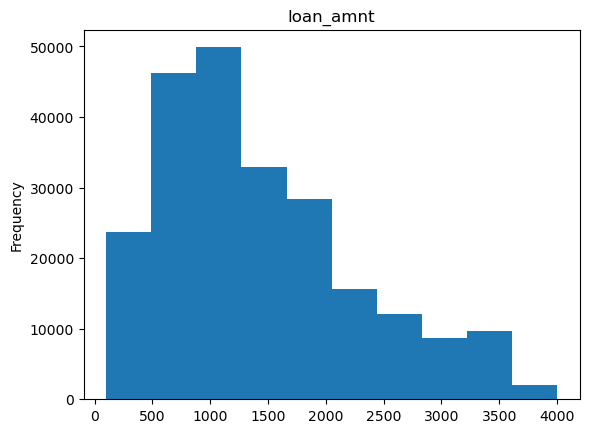

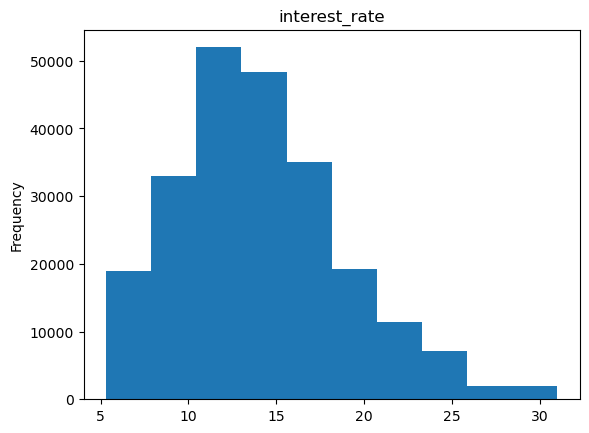

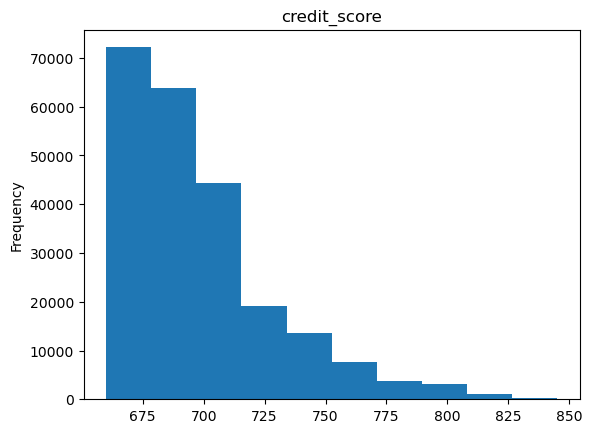

In [10]:
train_data_var_drop_loan_amnt = train_data_var_drop['loan_amnt']
train_data_var_drop_loan_amnt.plot.hist(title='loan_amnt')
plt.show()
train_data_interest_rate = train_data_var_drop['interest_rate']
train_data_interest_rate.plot.hist(title='interest_rate')
plt.show()
train_data_credit_score = train_data_var_drop['credit_score']
train_data_credit_score.plot.hist(title='credit_score')
plt.show()

### 質的データの分布を調べる

In [19]:
# 勤続年数
employment_length_counts = train_data_var_drop['employment_length'].value_counts()
print('employment_length:\n',employment_length_counts)
# 返済期間
term_counts = train_data_var_drop['term'].value_counts()
print('term:\n',term_counts)
# グレード
grade_counts = train_data_var_drop['grade'].value_counts()
print('grade:\n',grade_counts)
# 借り入れの目的
purpose_counts = train_data_var_drop['purpose'].value_counts()
print('purpose:\n',purpose_counts)
# 借入時の申請方式
application_type_counts = train_data_var_drop['application_type'].value_counts()
print('application_type:\n',application_type_counts)

employment_length:
 10 years    79095
2 years     22098
3 years     18772
0 years     18511
5 years     16995
1 year      15883
4 years     14895
6 years     13127
7 years     10678
8 years      9938
9 years      8979
Name: employment_length, dtype: int64
term:
 3 years    177580
5 years     51391
Name: term, dtype: int64
grade:
 B3    16060
B4    16028
C1    15664
B5    15004
B2    13727
C2    13612
C4    12981
B1    12500
C3    12389
C5    11941
A5     8798
D1     8545
D2     8403
A4     7455
D3     6702
D4     6260
A3     5823
A1     5510
A2     5372
D5     5318
E1     3334
E2     2884
E3     2865
E4     2569
E5     2186
F1     1676
F2     1317
F3     1100
F4      804
F5      761
G1      566
G2      308
G3      217
G4      182
G5      110
Name: grade, dtype: int64
purpose:
 debt_consolidation    133880
credit_card            45683
home_improvement       15043
other                  14327
major_purchase          5426
small_business          3218
car                     2725
medical  

### 質的データを棒グラフで表示する

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


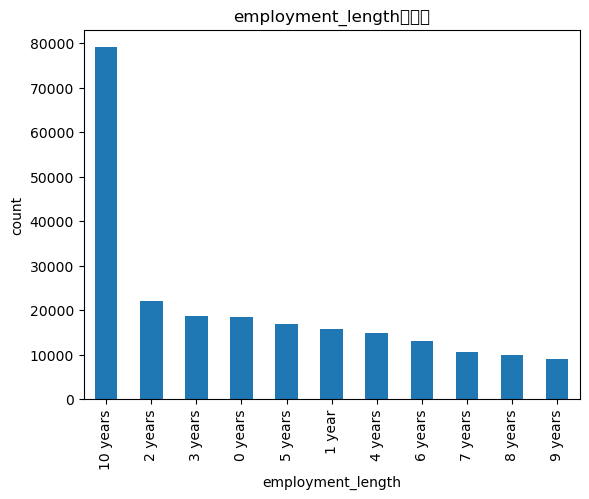

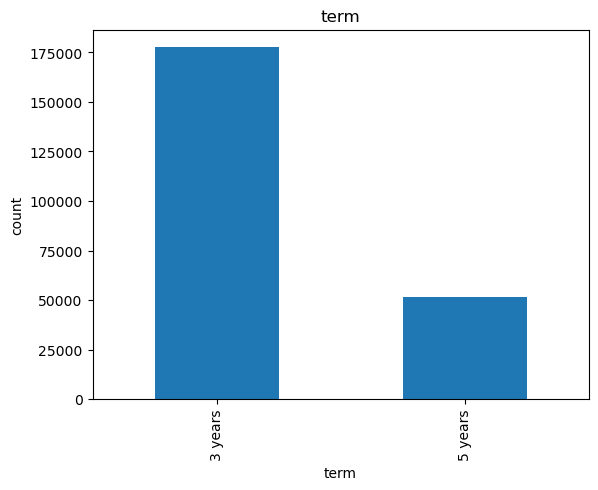

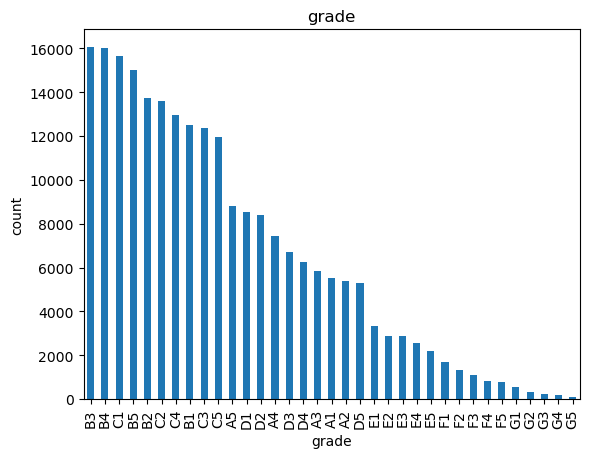

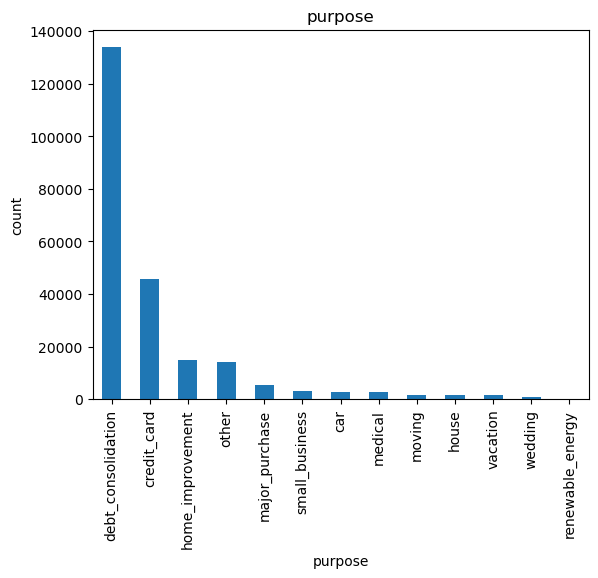

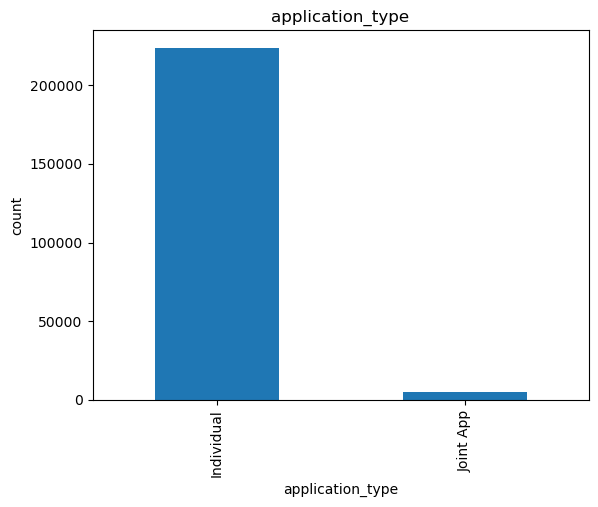

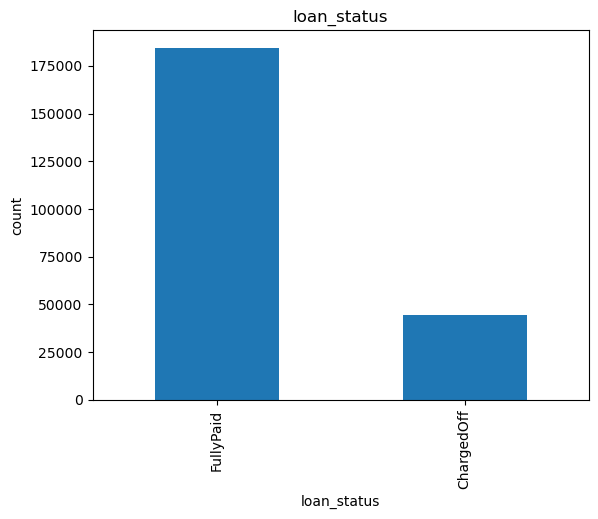

In [26]:
# 勤続年数
employment_length_counts = train_data_var_drop['employment_length'].value_counts()
employment_length_counts.plot.bar(title='employment_lengthの頻度')
plt.ylabel('count')
plt.xlabel('employment_length')
plt.show()
# 返済期間
term_counts = train_data_var_drop['term'].value_counts()
term_counts.plot.bar(title='term')
plt.xlabel('term')
plt.ylabel('count')
plt.show()
# グレード
grade_counts = train_data_var_drop['grade'].value_counts()
grade_counts.plot.bar(title='grade')
plt.xlabel('grade')
plt.ylabel('count')
plt.show()
# 借り入れの目的
purpose_counts = train_data_var_drop['purpose'].value_counts()
purpose_counts.plot.bar(title='purpose')
plt.xlabel('purpose')
plt.ylabel('count')
plt.show()
# 借入時の申請方式
application_type_counts = train_data_var_drop['application_type'].value_counts()
application_type_counts.plot.bar(title='application_type')
plt.xlabel('application_type')
plt.ylabel('count')
plt.show()
# loan_status
loan_status_counts = train_data_var_drop['loan_status'].value_counts()
loan_status_counts.plot.bar(title='loan_status')
plt.xlabel('loan_status')
plt.ylabel('count')
plt.show()
